# Business Problem

1. **Objective**
   - To assess if a transaction is risky (in other words, fraudulent) from the given credit card data.
   - Learn from various features of normal transactions to distinguish fraud transactions better.


2. **Machine Learning Problem**
   - Develop a machine learning model based on deep autoencoders to learn distribution and relation between features of normal transactions.


3. **Technology**
   - Python, Scikit-Learn, Tensorflow, Keras, Pandas, NumPy
   

4. **Decision making**
   - Select the best model which performs the best with respecrt to a better mean squared error.
   - Metrics: MSE
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real-time in assessing riskiness of a transacttion.



**Features**<br>
Timestamp<br>
Value<br>
C1<br>
C2<br>
C3<br>
C4<br>
C5<br>
C6<br>
C7<br>
C8<br>
C9<br>
C10<br>
C11<br>
C12<br>
Class<br>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
pdf = pd.read_csv("../../data/final_cred_data.csv", index_col=0)
pdf.head()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.222222,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.444444,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.777778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.222222,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.000000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


<Axes: ylabel='Density'>

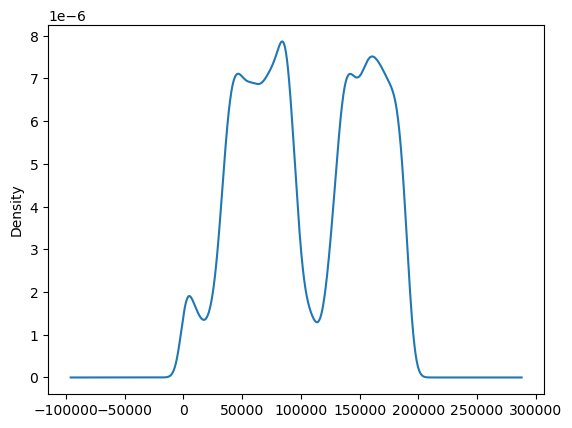

In [7]:
pdf['Timestamp'].plot.kde()

In [8]:
pdf.Class.value_counts()

0    139747
1       253
Name: Class, dtype: int64

In [9]:
pdf.isna().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

In [11]:
pdf[['C1']].describe()

,C1
count,116232.000000
mean,-13.647954
std,224.599903
min,-2000.000000
25%,-6.419730
50%,-1.250014
75%,5.063801
max,2000.000000


In [42]:
pdf[['C2']].describe()

,C2
count,129731.000000
mean,-15.797094
std,72.631165
min,-500.000000
25%,-0.262951
50%,-0.019520
75%,0.220734
max,100.000000


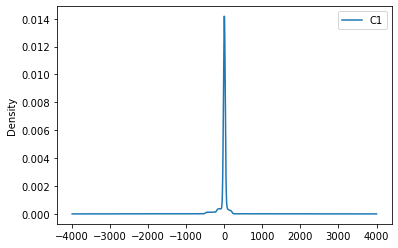

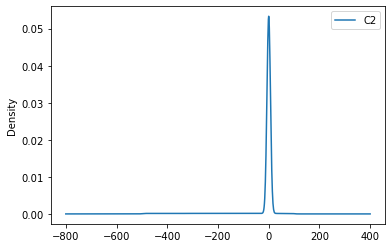

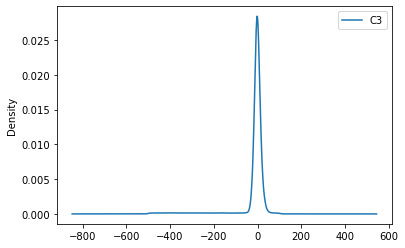

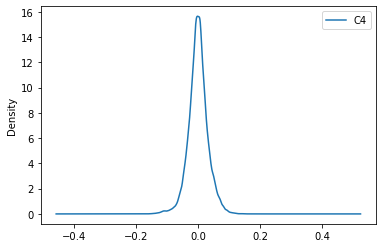

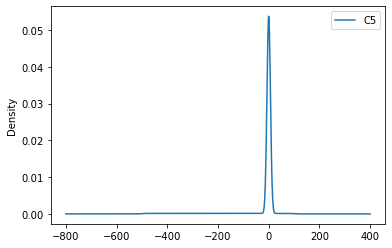

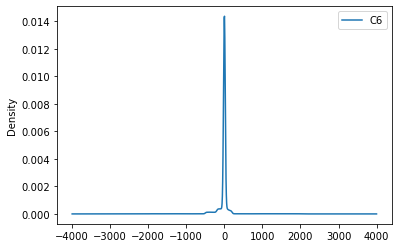

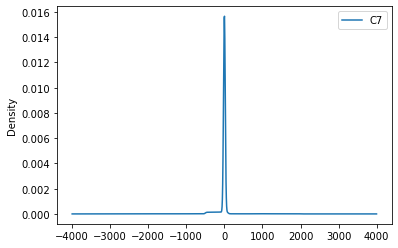

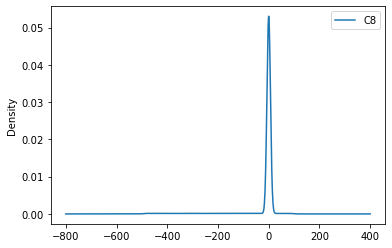

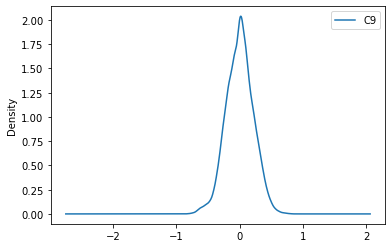

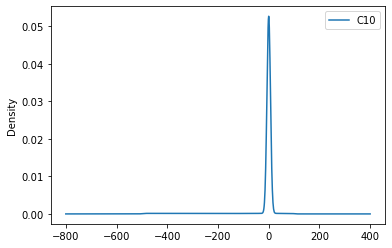

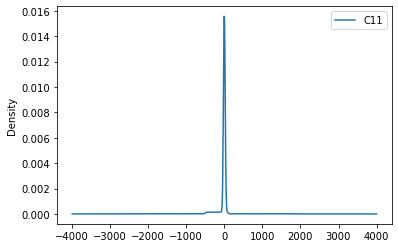

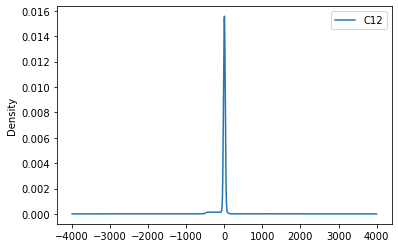

In [43]:
for elem in ['C1','C2','C3','C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']:
    pdf[[elem]].plot.kde()

In [15]:
pdf = pdf.fillna(pdf.mean()).drop("Timestamp", axis=1)

In [16]:
normalized_df=(pdf-pdf.min())/(pdf.max()-pdf.min())

In [17]:
train_x = normalized_df.drop("Class", axis=1).values
train_y = normalized_df.values

In [19]:
print(train_x.shape, train_y.shape)

(140000, 13) (140000, 14)


# Modeling

In [12]:
model = keras.Sequential(
                          [
                            keras.Input(shape=(13, )),
                            layers.Dense(13, activation="relu"),
                            layers.Dense(6, activation="relu"),
                            layers.Dense(6, activation="relu"),
                            layers.Dense(13, activation="linear"),
                          ]
                        )
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer)

In [20]:
model.fit(train_x, train_x, batch_size=128, epochs=20)

Epoch 1/20


2023-04-07 21:15:32.041124: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1094/1094 [==============================] - 1s 350us/step - loss: 0.0084
Epoch 2/20
1094/1094 [==============================] - 0s 332us/step - loss: 0.0031
Epoch 3/20
1094/1094 [==============================] - 0s 329us/step - loss: 0.0025
Epoch 4/20
1094/1094 [==============================] - 0s 332us/step - loss: 0.0024
Epoch 5/20
1094/1094 [==============================] - 0s 352us/step - loss: 0.0024
Epoch 6/20
1094/1094 [==============================] - 0s 334us/step - loss: 0.0024
Epoch 7/20
1094/1094 [==============================] - 0s 329us/step - loss: 0.0023
Epoch 8/20
1094/1094 [==============================] - 0s 333us/step - loss: 0.0023
Epoch 9/20
1094/1094 [==============================] - 0s 333us/step - loss: 0.0021
Epoch 10/20
1094/1094 [==============================] - 0s 333us/step - loss: 0.0019
Epoch 11/20
1094/1094 [==============================] - 0s 334us/step - loss: 0.0018
Epoch 12/20
1094/1094 [==============================] - 0s 330us/step - l

In [21]:
predictions = model.predict(train_x)

4375/4375 [==============================] - 1s 229us/step


In [22]:
error = np.square(np.subtract(predictions, train_x)).mean(axis=1)
print(np.square(np.subtract(predictions, train_x)).mean())

0.0017614522731278642


In [23]:
pdf_error = pd.DataFrame(error, columns=["error"])
pdf_error.head()

,error
0,0.000581
1,0.000509
2,0.001387
3,0.005699
4,0.000810


In [24]:
pdf_error.describe()

,error
count,140000.000000
mean,0.001761
std,0.003512
min,0.000024
25%,0.000291
50%,0.000594
75%,0.001297
max,0.113507


In [25]:
final_df = pd.concat([pdf.reset_index(drop=True), pdf_error.reset_index(drop=True)], axis=1)

<Axes: ylabel='Density'>

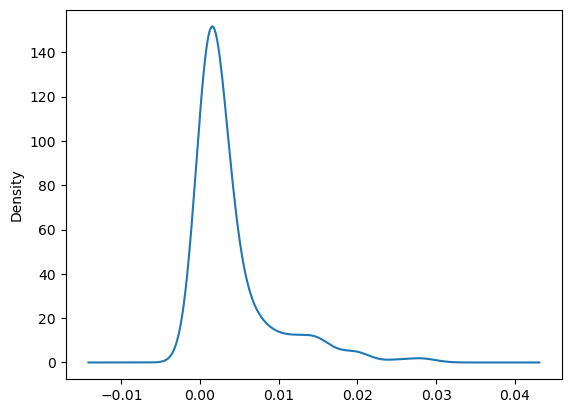

In [26]:
final_df[final_df.Class==1].error.plot.kde()

<Axes: ylabel='Density'>

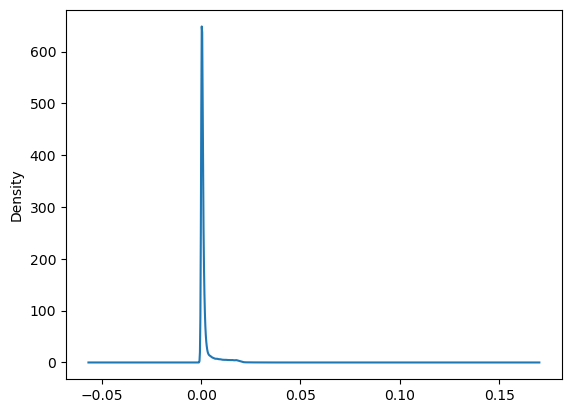

In [27]:
final_df[final_df.Class==0].error.plot.kde()

In [28]:
final_df[final_df.Class==0].head(10)

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,error
0,1.816,13.245219,-15.797094,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0,0.000581
1,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,-14.760374,0.062966,0.130546,-0.303582,-15.500080,-15.491673,0,0.000509
2,24.000,-9.067399,0.762501,-16.141105,0.052481,-0.101681,-88.000000,0.117912,-16.067148,0.358812,-0.367016,-15.500080,361.000000,0,0.001387
3,8.000,8.728304,-0.382673,-16.141105,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,-15.500080,-1.654373,0,0.005699
4,59.496,7.657141,0.150611,-16.141105,-0.034883,0.826100,0.357556,0.147640,-16.067148,0.080491,-0.693792,-0.308631,0.563570,0,0.000810
5,7.192,-6.944700,-0.136388,0.543172,-0.024708,0.112116,1.647884,-0.003729,0.039702,0.097664,-0.341836,-274.000000,-0.056484,0,0.000718
6,10.320,133.000000,-0.540177,8.803812,-0.007307,-67.000000,1.709944,-0.316351,-0.003741,0.187718,-16.029764,0.338621,0.227839,0,0.000332
7,1.584,-0.670264,-0.164626,-8.848897,0.002278,0.078981,1.143923,-472.000000,0.010555,0.065275,0.029735,-0.396261,-0.182626,0,0.000910
8,100.000,1.984216,0.416604,-178.000000,-0.003641,53.000000,-13.681959,0.109451,0.022316,-0.039217,0.438853,-0.184313,0.643273,0,0.001210
9,0.712,5.857276,-0.073466,0.667938,-0.000891,-0.012069,1.427191,-101.000000,-0.038324,0.014183,-0.109039,0.420946,-61.000000,0,0.000157
